In [8]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import glob
%matplotlib inline

In [9]:
link = []
link = glob.glob('../dataset/*.ppm')

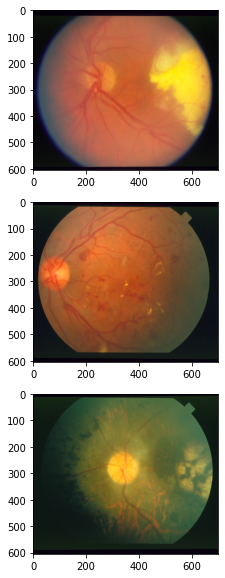

In [20]:
img = cv2.imread(link[0])
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# plt.figure(figsize=(5,15))

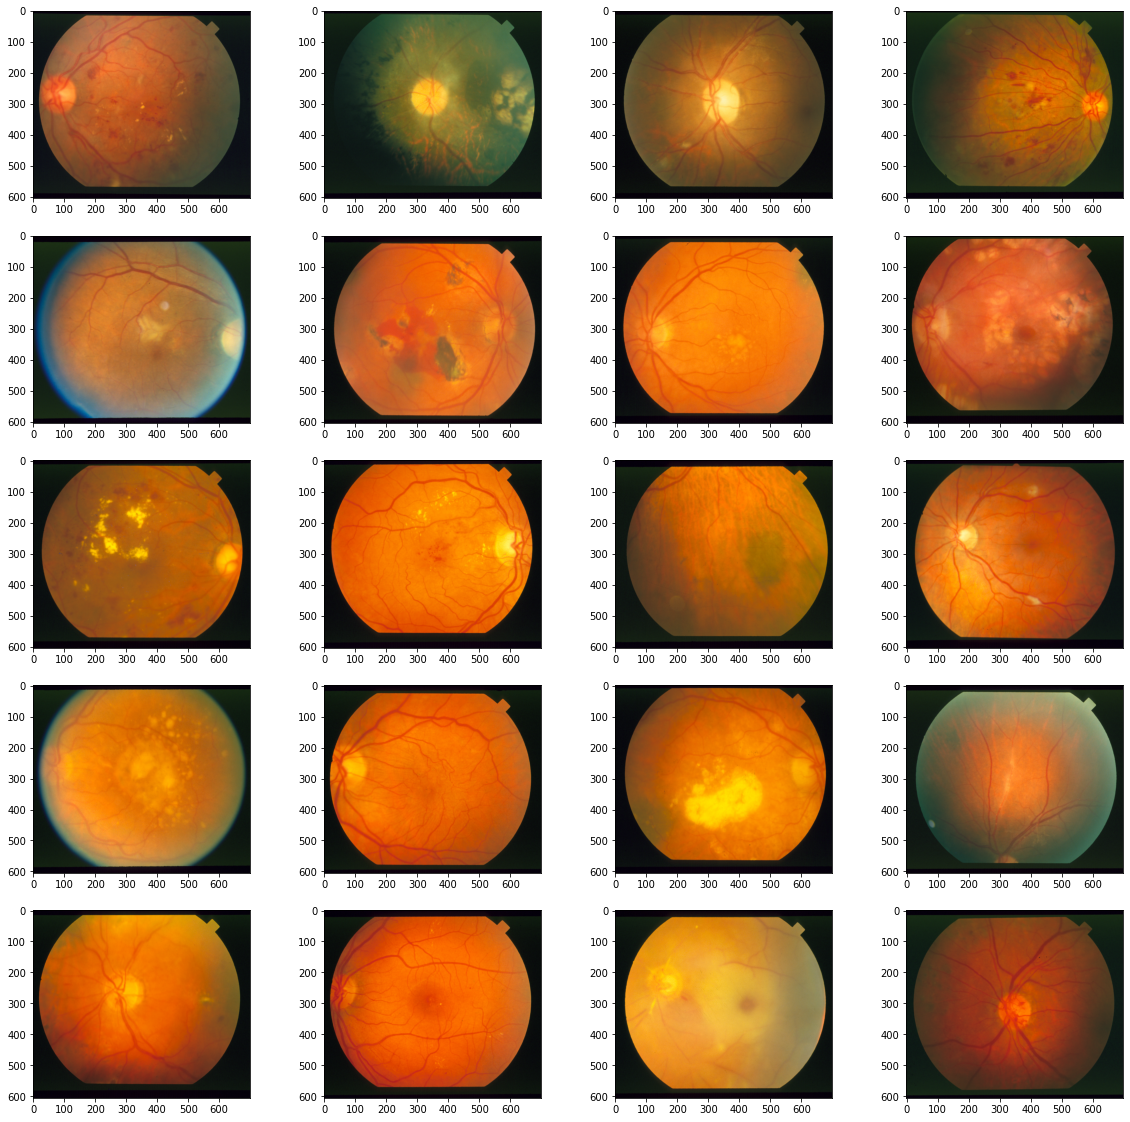

In [31]:
rows = 5
columns = 4
fig = plt.figure(figsize=(20, 20))
for i in range(1, 21):
    fig.add_subplot(rows, columns, i)
    img = cv2.imread(link[i])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img,cmap='gray')
# plt.tight_layout()
# plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [32]:
print(img.shape)

(605, 700, 3)


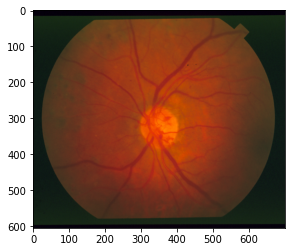

In [33]:
plt.imshow(img)

In [34]:
imgR = img[:,:,0]
imgG = img[:,:,1]
imgB = img[:,:,2]

Text(0.5, 1.0, 'Blue Channel')

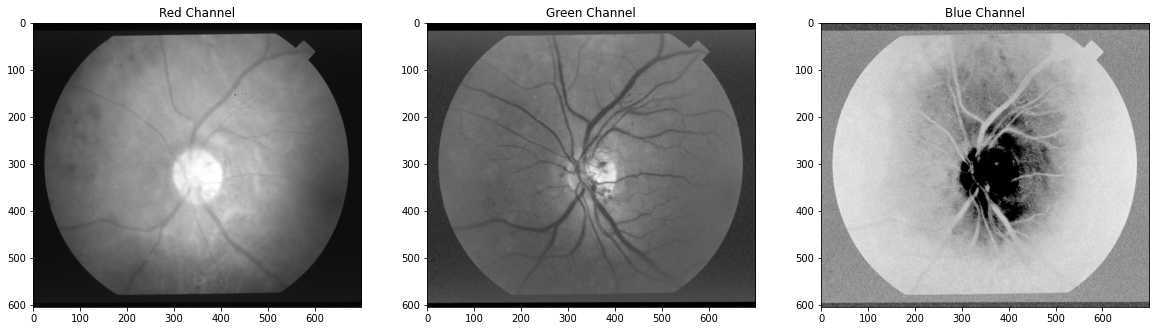

In [38]:
fig = plt.figure(figsize=(20, 10))
fig.add_subplot(1, 3, 1)
plt.imshow(imgR,cmap='gray')
plt.title('Red Channel')
fig.add_subplot(1, 3, 2)
plt.imshow(imgG,cmap='gray')
plt.title('Green Channel')
fig.add_subplot(1, 3, 3)
plt.imshow(imgB,cmap='gray')
plt.title('Blue Channel')

In [40]:
def drawHistogram(img):
    his = np.zeros(256,)
    a = img.flatten()
    for i in a:
        his[i] = his[i]+1
    return his

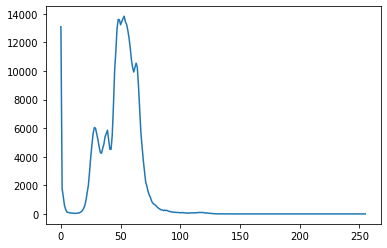

In [41]:
histg = drawHistogram(imgG)
# show the plotting graph of an image
plt.plot(histg)
plt.show()

(array([1.4891e+04, 2.0660e+03, 2.3900e+02, 2.0800e+02, 1.0600e+02,
        1.3100e+02, 1.3700e+02, 7.7900e+02, 1.5360e+03, 6.4310e+03,
        1.4286e+04, 1.1714e+04, 1.4302e+04, 7.6740e+03, 1.3057e+04,
        1.1554e+04, 1.5989e+04, 1.2325e+04, 3.1877e+04, 2.7363e+04,
        4.2262e+04, 4.0262e+04, 2.5143e+04, 3.2798e+04, 1.8702e+04,
        2.7144e+04, 1.5413e+04, 1.3959e+04, 4.9380e+03, 5.0390e+03,
        3.1420e+03, 1.3730e+03, 1.3830e+03, 6.1100e+02, 7.7700e+02,
        4.8400e+02, 5.2200e+02, 2.6500e+02, 3.0500e+02, 1.2800e+02,
        2.6100e+02, 2.4200e+02, 1.3400e+02, 1.9700e+02, 1.5200e+02,
        2.3800e+02, 1.9500e+02, 2.9800e+02, 1.4500e+02, 1.7100e+02,
        9.9000e+01, 2.9000e+01, 1.1000e+01, 1.0000e+01, 3.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

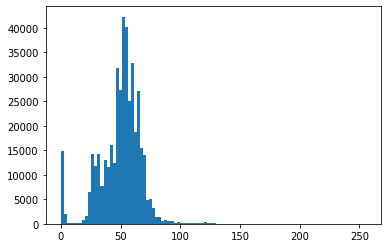

In [71]:
clahe = cv2.createCLAHE(clipLimit=0.05, tileGridSize=(8,8))
clahe_img = clahe.apply(imgG)
plt.hist(clahe_img.flat, bins=100, range=(0,255))
# #Combine the CLAHE enhanced L-channel back with A and B channels
# updated_lab_img2 = cv2.merge((clahe_img, a, b))

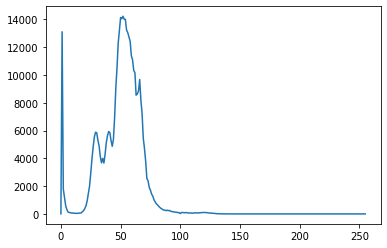

In [73]:
plt.plot(drawHistogram(clahe_img))

Text(0.5, 1.0, 'Applying CLAHE')

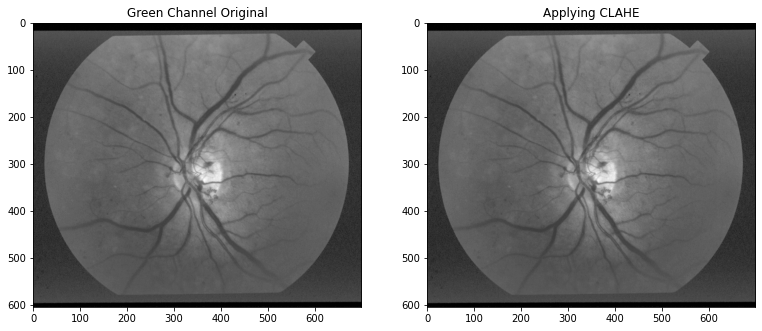

In [74]:
fig = plt.figure(figsize=(20, 10))
fig.add_subplot(1, 3, 1)
plt.imshow(imgG,cmap='gray')
plt.title('Green Channel Original')
fig.add_subplot(1, 3, 2)
plt.imshow(clahe_img,cmap='gray')
plt.title('Applying CLAHE')

In [99]:
#               1 2 3 4 5 6 7 8   1 2 3 4 5 6 7 8 
SE = np.array([[0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0],
               [0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0],
               [0,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0],
               [0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0],
               [0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0],
               [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0],
               [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
               [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0],
               [0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0],
               [0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0],
               [0,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0],
               [0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0],
               [0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0]],dtype= np.uint8)

SE1 = np.array([[0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0],
               [0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0],
               [0,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0],
               [0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0],
               [0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0],
               [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0],
               [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0],
               ####################################
               [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
               ####################################
               [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0],
               [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0],
               [0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0],
               [0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0],
               [0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0],
               [0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0],
               [0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0]],dtype= np.uint8)

In [100]:
Tclose = cv2.morphologyEx(clahe_img, cv2.MORPH_CLOSE, SE1)
Topen = cv2.morphologyEx(Tclose,cv2.MORPH_OPEN,SE1)
TopHat = (clahe_img - Topen)#.astype(np.uint8)

Text(0.5, 1.0, 'Difference')

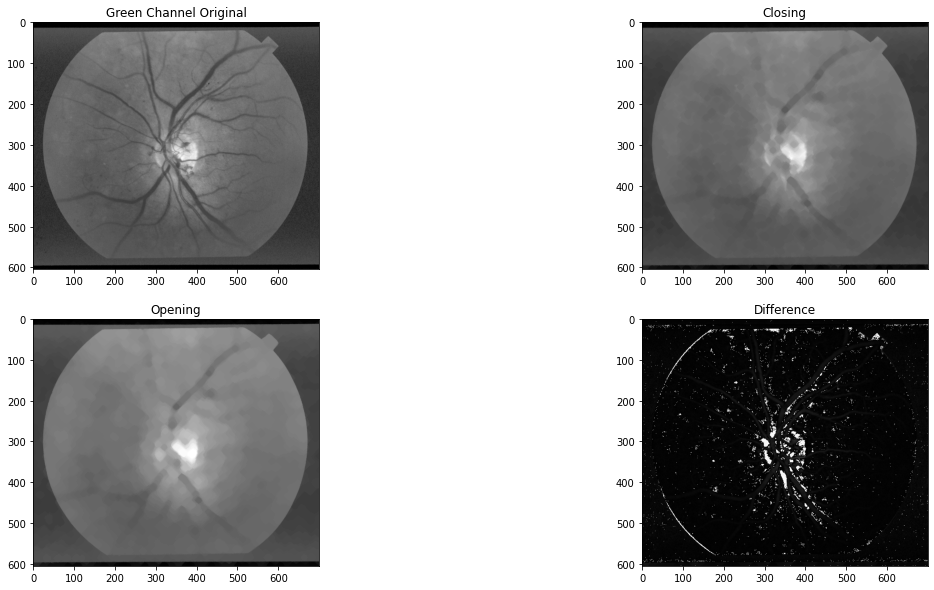

In [102]:
#Need to figure it out
fig = plt.figure(figsize=(20, 10))
fig.add_subplot(2, 2, 1)
plt.imshow(clahe_img,cmap='gray')
plt.title('Green Channel Original')
fig.add_subplot(2, 2, 2)
plt.imshow(Tclose,cmap='gray')
plt.title('Closing')
fig.add_subplot(2, 2, 3)
plt.imshow(Topen,cmap='gray')
plt.title('Opening')
fig.add_subplot(2, 2, 4)
plt.imshow(1-TopHat,cmap='gray')
plt.title('Difference')